In [2]:
from MieSppForce import dipoles,force,frenel, green_func
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

c_const = 299792458

In [3]:
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

wl=800
dist = 2
STOP=45
angle=25*np.pi/180
phase=0
a_angle = np.pi/4

R = np.linspace(50,120,40)

P,M = np.empty((len(R),3), dtype=complex),np.empty((len(R),3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0, dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m
    
    

  0%|          | 0/40 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 40/40 [00:46<00:00,  1.16s/it]


In [1]:

from scipy.integrate import quad
c_const = 299792458

def get_intencity(wl, P,M, eps_Au):
    px,py,pz = P
    mx, my,mz = M
    ka = -1j*np.sqrt(1/(eps_Au(wl)+1))
    kspp = np.sqrt(eps_Au(wl)/(eps_Au(wl)+1))
    return lambda phi:  np.abs((mx/c_const+1j*ka*py)*np.sin(phi) + (my/c_const - 1j*ka*px)*np.cos(phi) - kspp*pz)**2
    


In [10]:

DIRECTIVITY = np.zeros((4, len(R)))
for i in range(len(R)):
    phi = np.linspace(np.pi/2, (i+1)*np.pi/2, 100)
    intencity = get_intencity(wl, P[i,:], M[i,:], eps_Au)
    Imax = quad(intencity, 0, np.pi*2)[0]
    
    DIRECTIVITY[0,i] = intencity(0)*2*np.pi/Imax
    DIRECTIVITY[1,i] = intencity(np.pi/2)*2*np.pi/Imax
    DIRECTIVITY[2,i] = intencity(np.pi)*2*np.pi/Imax
    DIRECTIVITY[3,i] = intencity(3*np.pi/2)*2*np.pi/Imax

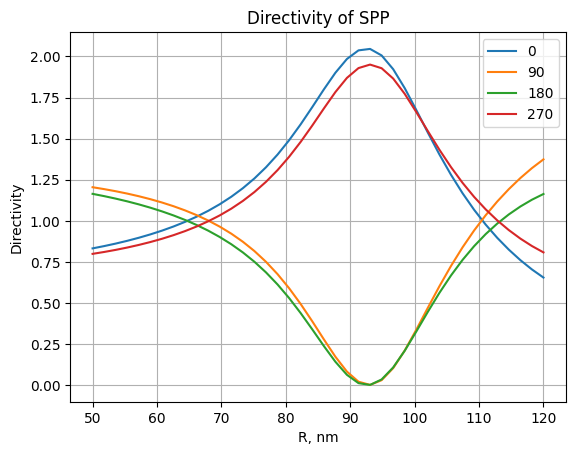

In [11]:
plt.plot(R, DIRECTIVITY[0,:], label='0')
plt.plot(R, DIRECTIVITY[1,:], label='90')
plt.plot(R, DIRECTIVITY[2,:], label='180')
plt.plot(R, DIRECTIVITY[3,:], label='270')
plt.xlabel('R, nm')
plt.ylabel('Directivity')
plt.title('Directivity of SPP')
plt.legend()
plt.grid()
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\2843326845.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\2843326845.py:7: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\2843326845.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.yl

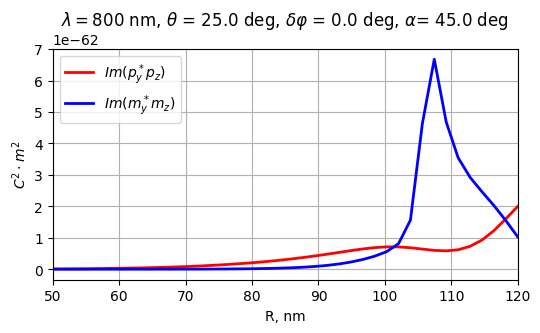

In [23]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,1])*P[:,2]), label='$Im(p_y^* p_z)$', lw=2, c='r')

plt.plot(R, np.imag(np.conj(M[:,1])*M[:,2])/c_const**2, label='$Im(m_y^* m_z)$', lw=2, c='b')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1168434363.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1168434363.py:7: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1168434363.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.yl

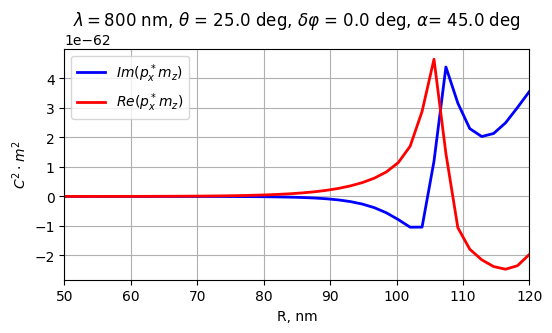

In [24]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,0])*M[:,2])/c_const, label='$Im(p_x^* m_z)$', lw=2, c='b')

plt.plot(R, np.real(np.conj(P[:,0])*M[:,2])/c_const, label='$Re(p_x^* m_z)$', lw=2, c='r')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1675559116.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1675559116.py:7: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1675559116.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.yl

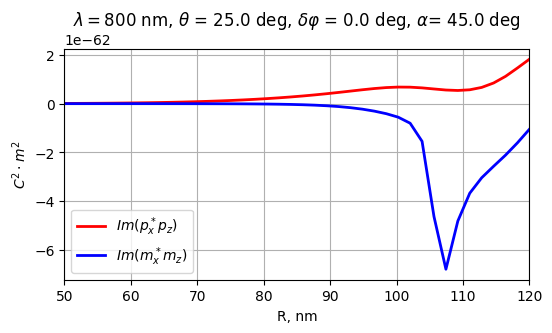

In [25]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,0])*P[:,2]), label='$Im(p_x^* p_z)$', lw=2, c='r')

plt.plot(R, np.imag(np.conj(M[:,0])*M[:,2])/c_const**2, label='$Im(m_x^* m_z)$', lw=2, c='b')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\4107731855.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\4107731855.py:7: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\4107731855.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.yl

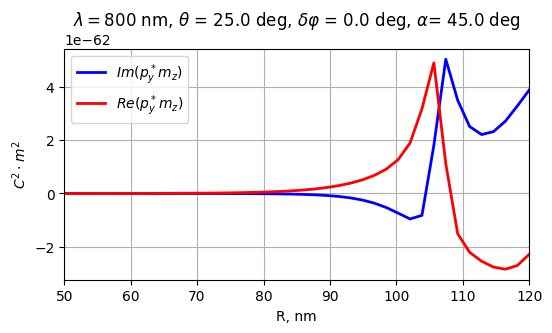

In [26]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,1])*M[:,2])/c_const, label='$Im(p_y^* m_z)$', lw=2, c='b')

plt.plot(R, np.real(np.conj(P[:,1])*M[:,2])/c_const, label='$Re(p_y^* m_z)$', lw=2, c='r')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()

In [46]:
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

dyrotGxzH= np.empty(len(R), dtype=complex)
dyrotGzxH= np.empty_like(dyrotGxzH)

dyGyzE= np.empty(len(R), dtype=complex)
dyGyzH= np.empty(len(R), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0, dist+R[i]]
    dyGE, dyGH = green_func.dy_green_E_H(wl, point[2], eps_Au, stop=STOP)
    dyrotGE, dyrotGH = green_func.dy_rot_green_E_H(wl, point[2], eps_Au, stop=STOP)
    dyrotGxzH[i] = dyrotGH[0,2]
    dyrotGzxH[i] = dyrotGH[2,0]
    dyGyzE[i] = dyGE[1,2]
    dyGyzH[i] = dyGH[1,2]

  0%|          | 0/40 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 40/40 [00:16<00:00,  2.38it/s]


In [28]:
mu0_const = 4*np.pi * 1e-7
omega = 2*np.pi*c_const/wl/1e-9

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\4235274288.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\4235274288.py:11: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')


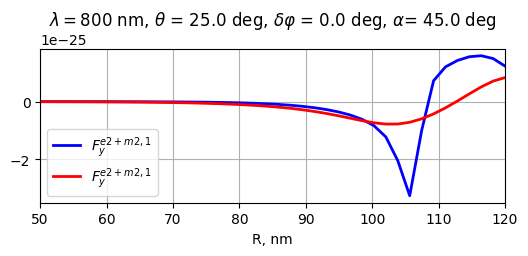

In [38]:
plt.figure(figsize=(6,2))

plt.plot(R, -omega*mu0_const*np.real(np.conj(P[:,0])*M[:,2])*np.imag(dyrotGxzH), label='$F_y^{e2+m2,1}$', lw=2, c='b')

plt.plot(R, -omega*mu0_const*np.real(np.conj(P[:,2])*M[:,0])*np.imag(dyrotGzxH), label='$F_y^{e2+m2,1}$', lw=2, c='r')

# plt.plot(R, -omega*mu0_const*np.real(np.conj(P[:,0])*M[:,2])*np.imag(dyrotGxzH) -omega*mu0_const*np.real(np.conj(P[:,2])*M[:,0])*np.imag(dyrotGzxH), label='$F_y^{e2+m2}$', lw=2, c='black')



plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.grid()
plt.legend()
plt.savefig(f'F_y_e2m2_comp_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', bbox_inches='tight')
plt.show()

# 

In [ ]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(dyrotGxzH), label='$Im(\partial_y \\nabla\\times G_{xz}^H)$', lw=2, c='b')

plt.plot(R, np.real(dyrotGxzH), label='$Re(\partial_y \\nabla\\times G_{xz}^H )$', lw=2, c='r')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.grid()
plt.legend()
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1696163723.py:5: SyntaxWarning: invalid escape sequence '\c'
  axs[0].set_ylabel('$C^2 \cdot m^2$')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1696163723.py:10: SyntaxWarning: invalid escape sequence '\c'
  axs[0].set_ylabel('$C^2 \cdot m^2$')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1696163723.py:11: SyntaxWarning: invalid escape sequence '\l'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)
C

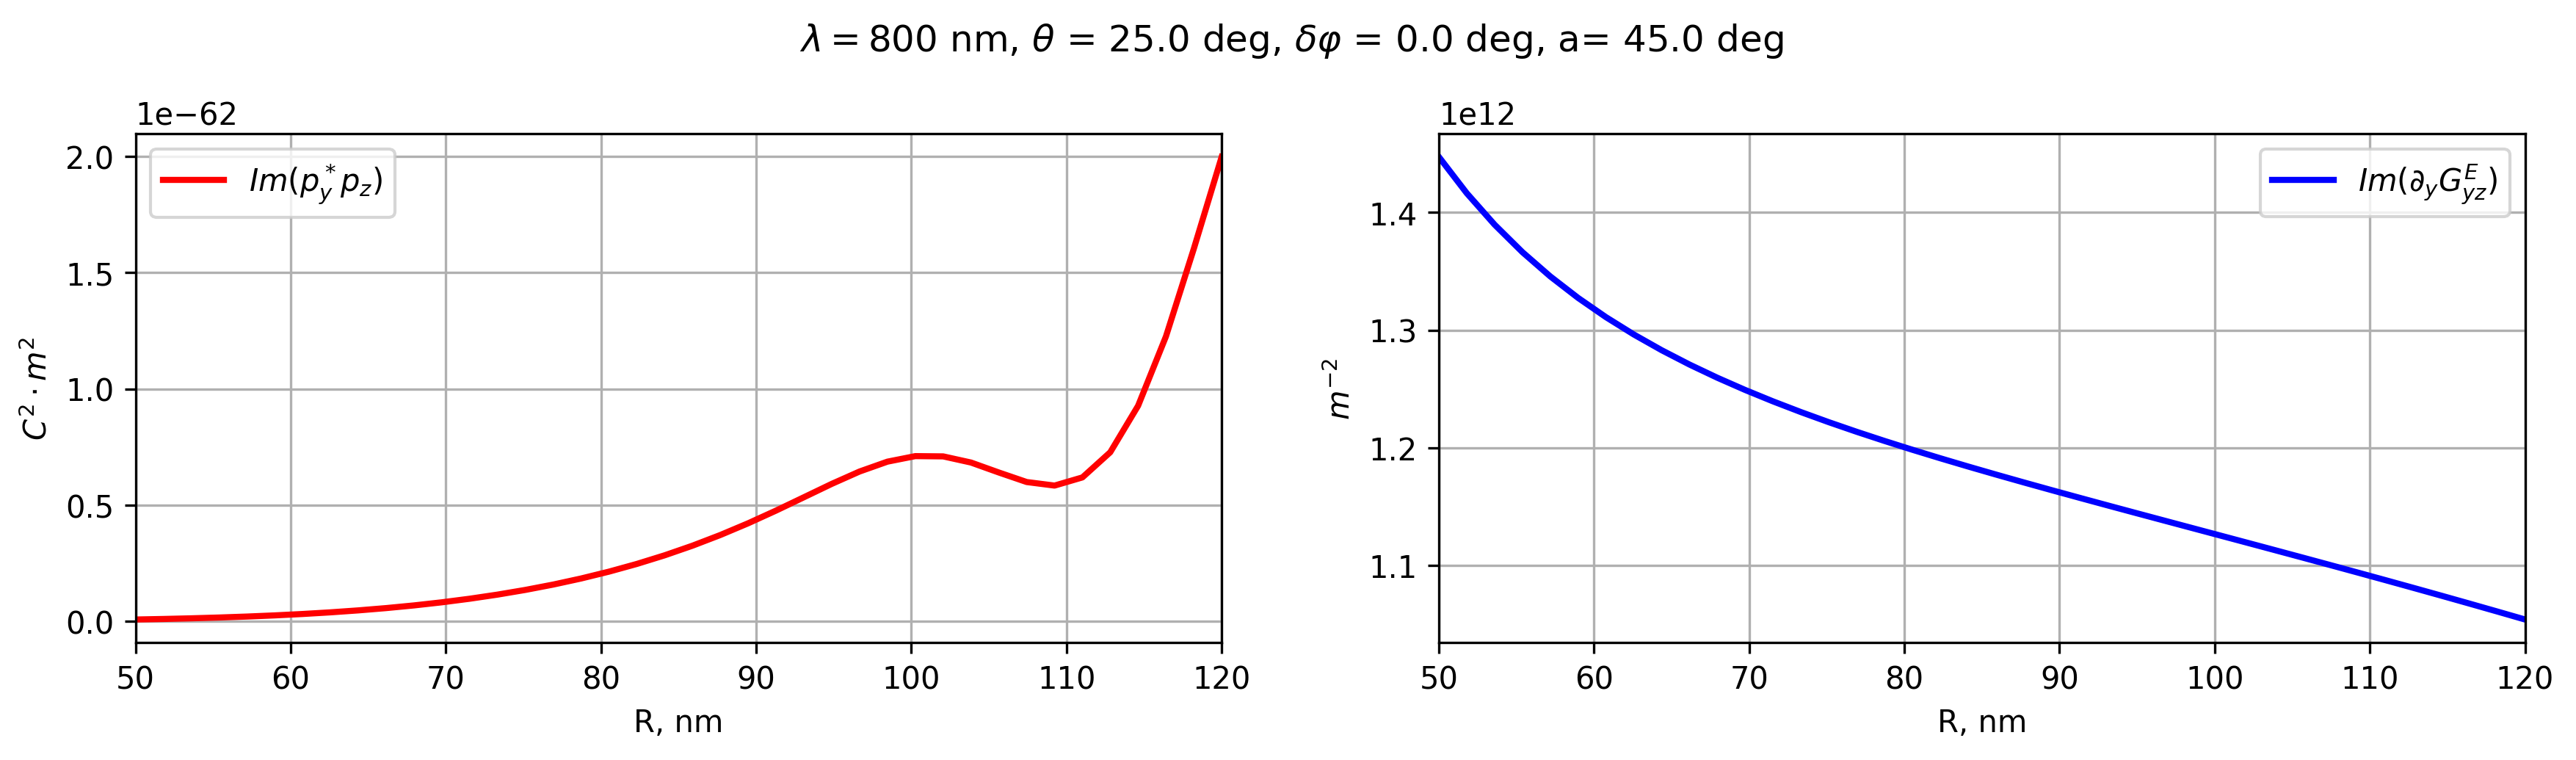

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), dpi=300)

# Plot dipole moments product
axs[0].plot(R, np.imag(np.conj(P[:,1])*P[:,2]), label='$Im(p_y^* p_z)$', lw=2, c='r')
axs[0].set_ylabel('$C^2 \cdot m^2$')
axs[0].grid()
axs[0].legend()
axs[0].set_xlim([R[0],R[-1]])
axs[0].set_xlabel('R, nm')
axs[0].set_ylabel('$C^2 \cdot m^2$')
fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)

# Plot green function component
axs[1].plot(R, np.imag(dyGyzE), label='$Im(\\partial_y  G_{yz}^E)$', lw=2, c='b')
axs[1].set_xlabel('R, nm')
axs[1].set_ylabel('$m^{-2}$')
axs[1].grid()
axs[1].set_xlim([R[0],R[-1]])
axs[1].legend()

plt.savefig(f'pypz_dyGyzE_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', bbox_inches='tight')
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1656597548.py:5: SyntaxWarning: invalid escape sequence '\c'
  axs[0].set_ylabel('$A^2 \cdot m^4$')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1656597548.py:10: SyntaxWarning: invalid escape sequence '\l'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1656597548.py:10: SyntaxWarning: invalid escape sequence '\d'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {roun

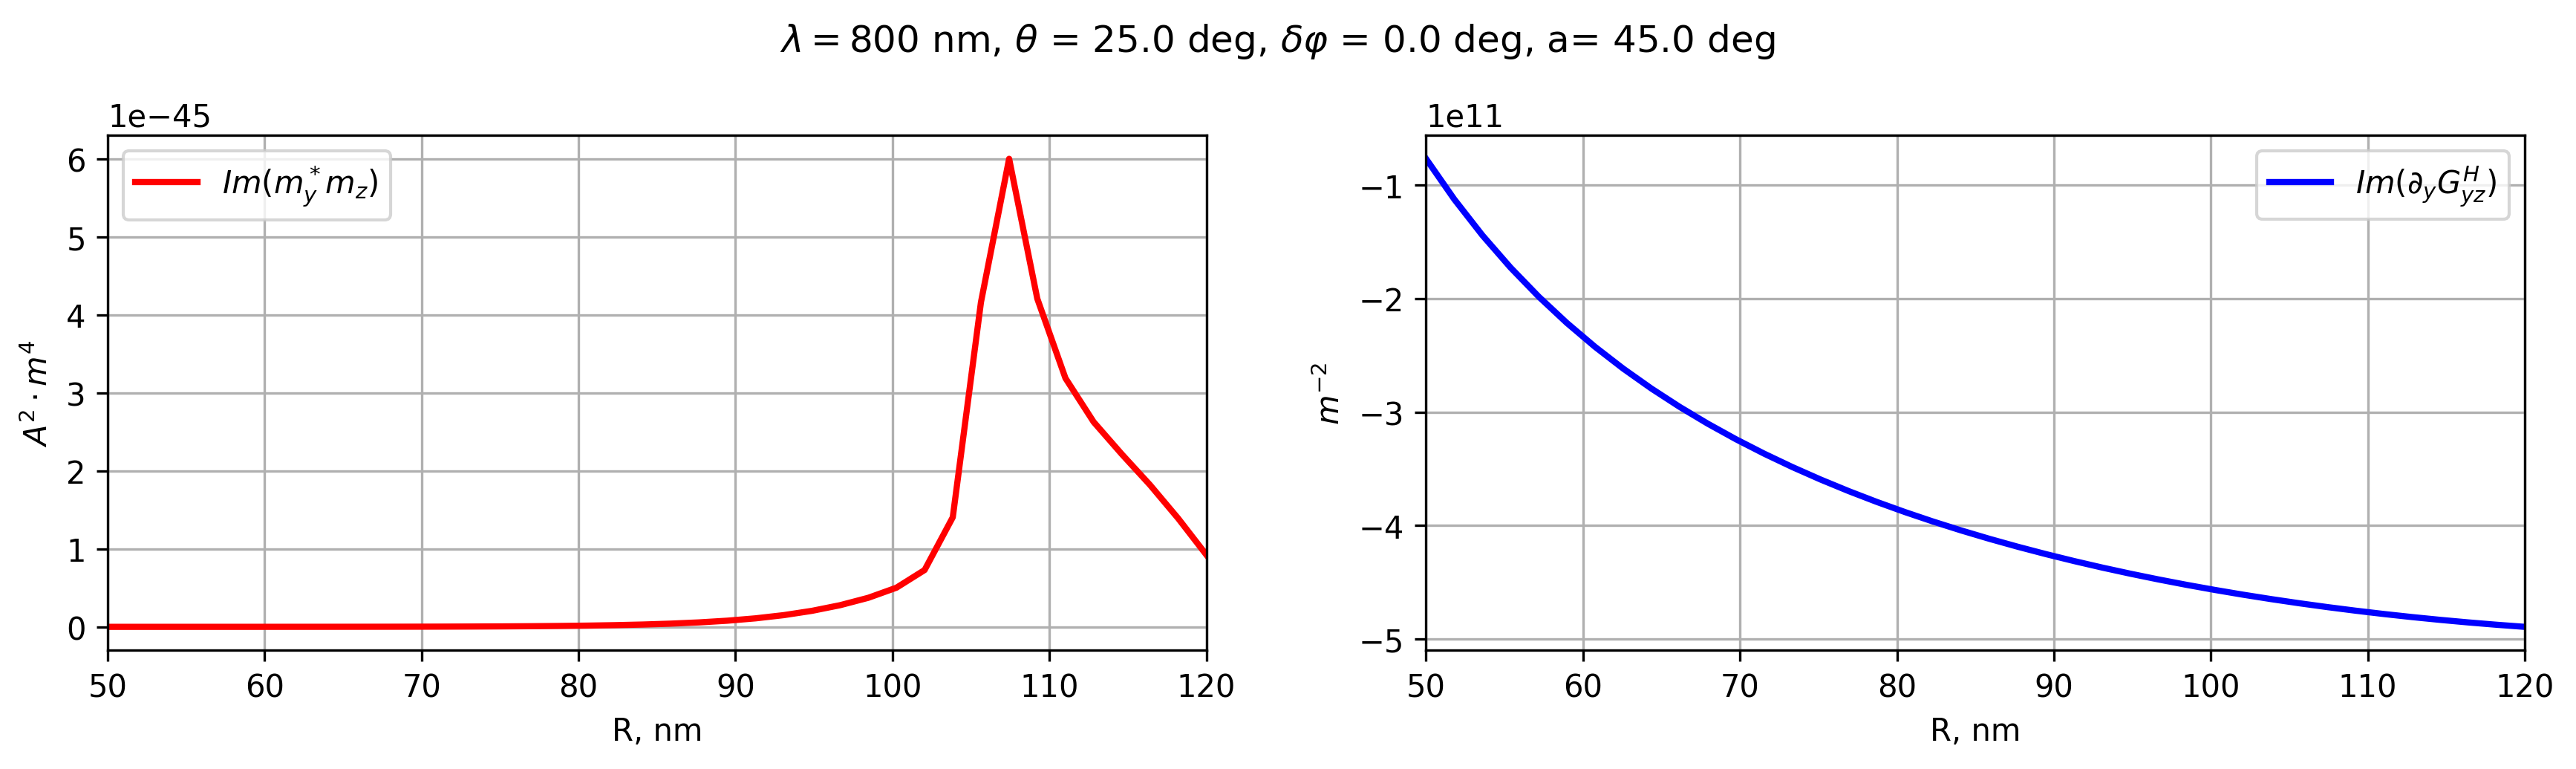

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), dpi=300)

# Plot dipole moments product
axs[0].plot(R, np.imag(np.conj(M[:,1])*M[:,2]), label='$Im(m_y^* m_z)$', lw=2, c='r')
axs[0].set_ylabel('$A^2 \cdot m^4$')
axs[0].grid()
axs[0].legend()
axs[0].set_xlim([R[0],R[-1]])
axs[0].set_xlabel('R, nm')
fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)

# Plot green function component
axs[1].plot(R, np.imag(dyGyzH), label='$Im(\\partial_y  G_{yz}^H)$', lw=2, c='b')
axs[1].set_xlabel('R, nm')
axs[1].set_ylabel('$m^{-2}$')
axs[1].grid()
axs[1].set_xlim([R[0],R[-1]])
axs[1].legend()

plt.savefig(f'mymz_dyGyzH_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', bbox_inches='tight')
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\3289081482.py:5: SyntaxWarning: invalid escape sequence '\c'
  axs[0].set_ylabel('$C \cdot A \cdot m^3$')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\3289081482.py:11: SyntaxWarning: invalid escape sequence '\l'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\3289081482.py:11: SyntaxWarning: invalid escape sequence '\d'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a=

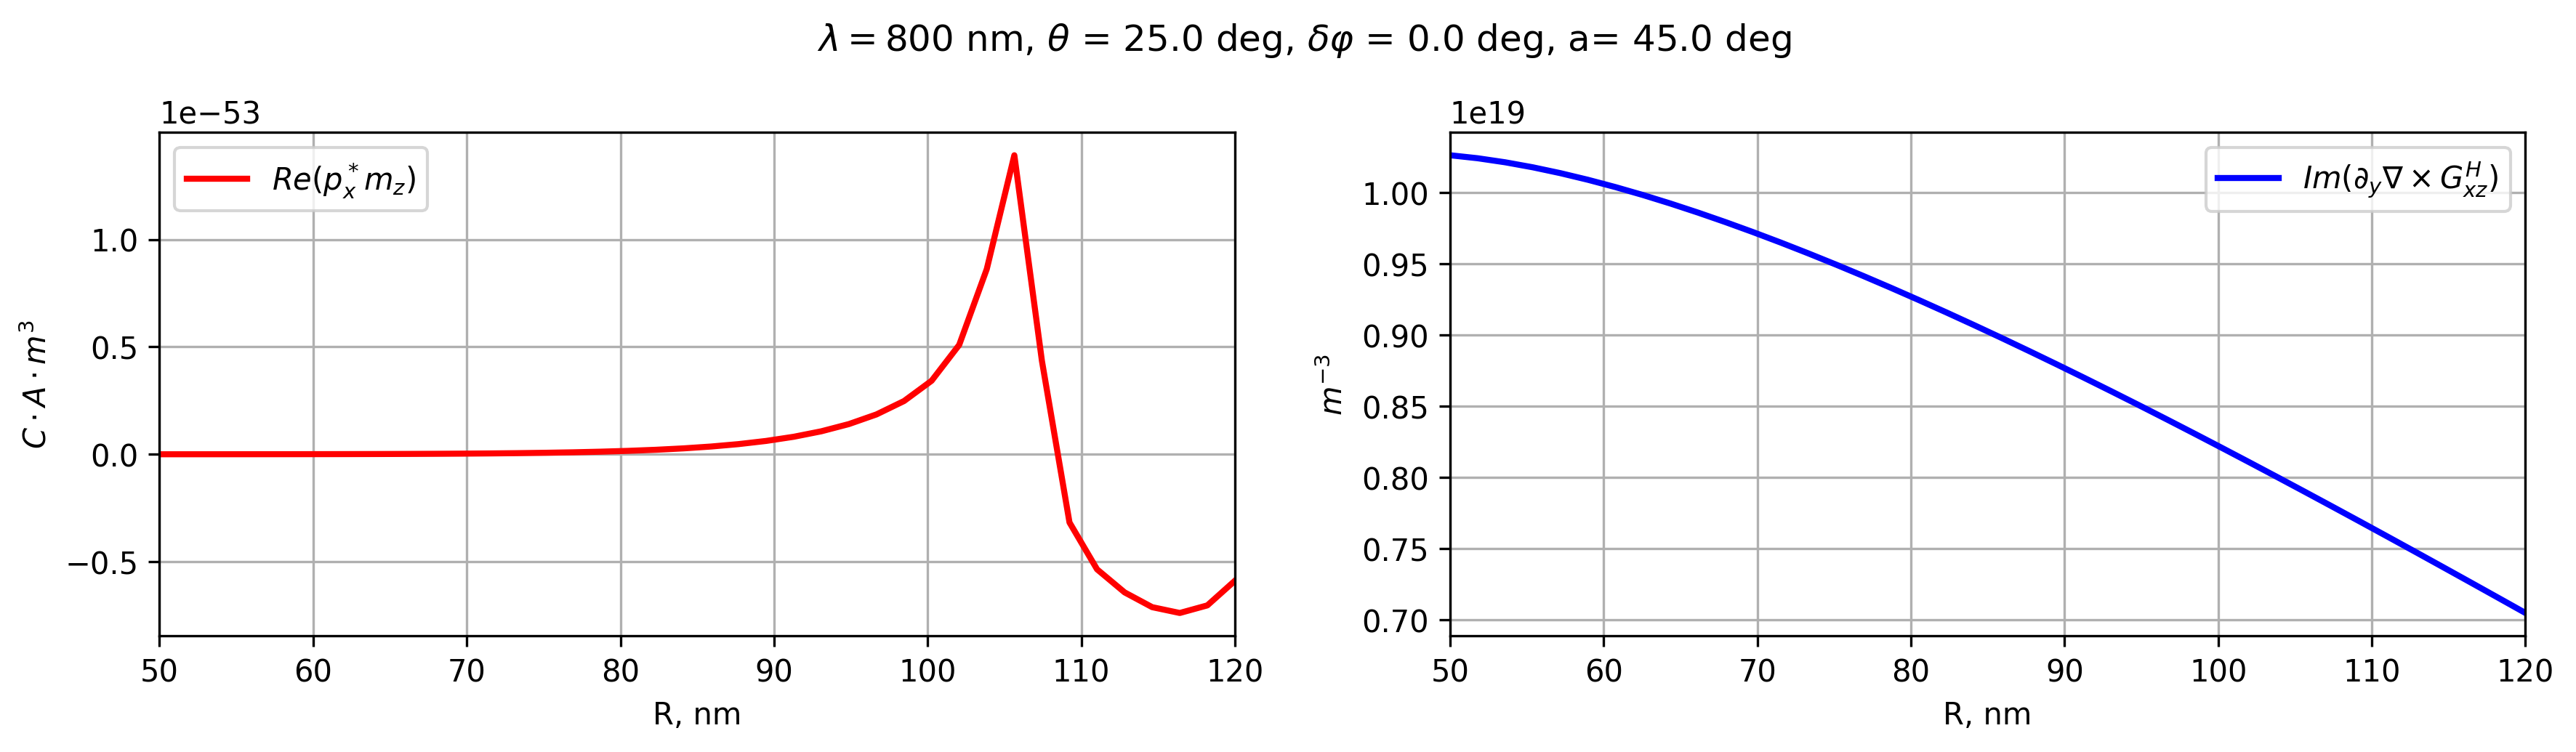

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), dpi=300)

# Plot dipole moments product
axs[0].plot(R, np.real(np.conj(P[:,0])*M[:,2]), label='$Re(p_x^* m_z)$', lw=2, c='r')
axs[0].set_ylabel('$C \cdot A \cdot m^3$')
axs[0].grid()
axs[0].legend()
axs[0].set_xlim([R[0],R[-1]])
axs[0].set_xlabel('R, nm')

fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)

# Plot green function component
axs[1].plot(R, np.imag(dyrotGxzH), label='$Im(\\partial_y  \\nabla \\times G_{xz}^H)$', lw=2, c='b')
axs[1].set_xlabel('R, nm')
axs[1].set_ylabel('$m^{-3}$')
axs[1].grid()
axs[1].set_xlim([R[0],R[-1]])
axs[1].legend()

plt.savefig(f'pxmz_dyrotGxzH_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', bbox_inches='tight')
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\3652985325.py:5: SyntaxWarning: invalid escape sequence '\c'
  axs[0].set_ylabel('$C \cdot A \cdot m^3$')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\3652985325.py:11: SyntaxWarning: invalid escape sequence '\l'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\3652985325.py:11: SyntaxWarning: invalid escape sequence '\d'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a=

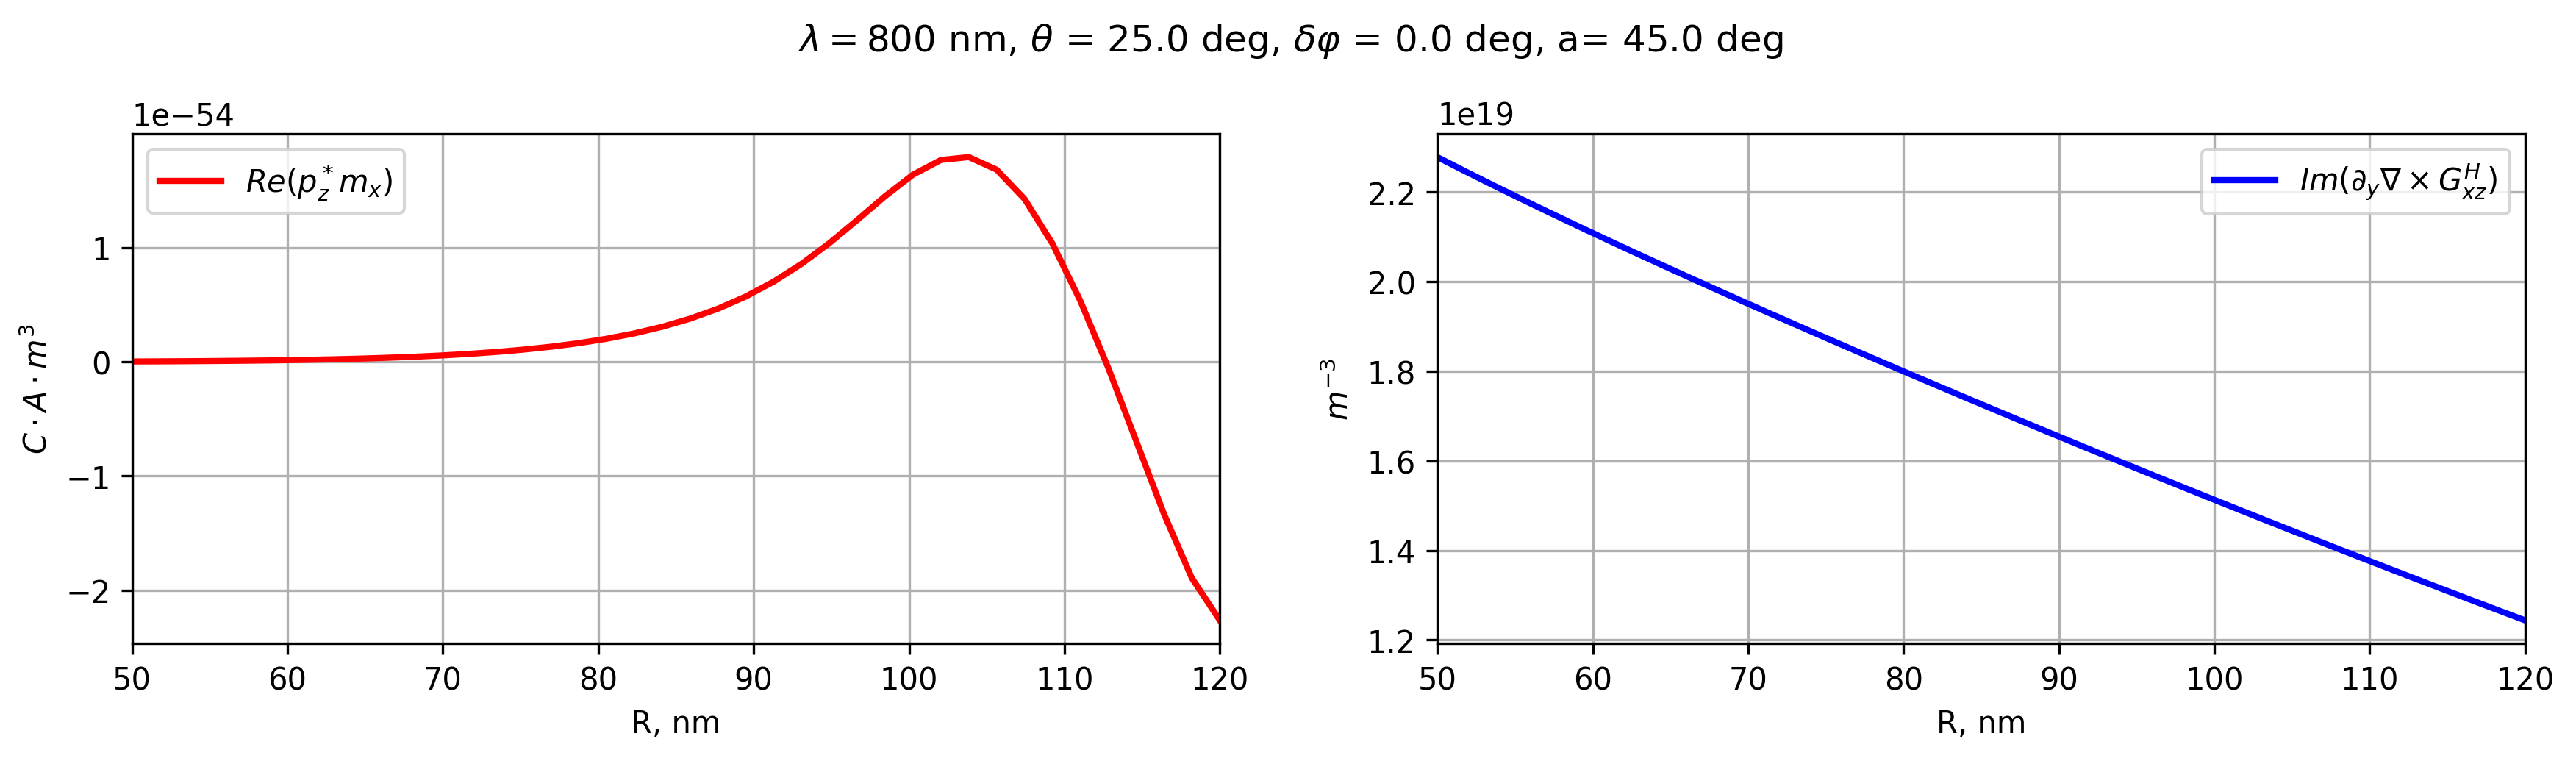

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), dpi=300)

# Plot dipole moments product
axs[0].plot(R, np.real(np.conj(P[:,2])*M[:,0]), label='$Re(p_z^* m_x)$', lw=2, c='r')
axs[0].set_ylabel('$C \cdot A \cdot m^3$')
axs[0].grid()
axs[0].legend()
axs[0].set_xlim([R[0],R[-1]])
axs[0].set_xlabel('R, nm')

fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)

# Plot green function component
axs[1].plot(R, np.imag(dyrotGzxH), label='$Im(\\partial_y  \\nabla \\times G_{xz}^H)$', lw=2, c='b')
axs[1].set_xlabel('R, nm')
axs[1].set_ylabel('$m^{-3}$')
axs[1].grid()
axs[1].set_xlim([R[0],R[-1]])
axs[1].legend()

plt.savefig(f'pzmx_dyrotGzxH_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', bbox_inches='tight')
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1120084742.py:6: SyntaxWarning: invalid escape sequence '\c'
  axs.set_ylabel('$C \cdot A \cdot m^3$')
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1120084742.py:11: SyntaxWarning: invalid escape sequence '\l'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)
C:\Users\borod\AppData\Local\Temp\ipykernel_16488\1120084742.py:11: SyntaxWarning: invalid escape sequence '\d'
  fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {r

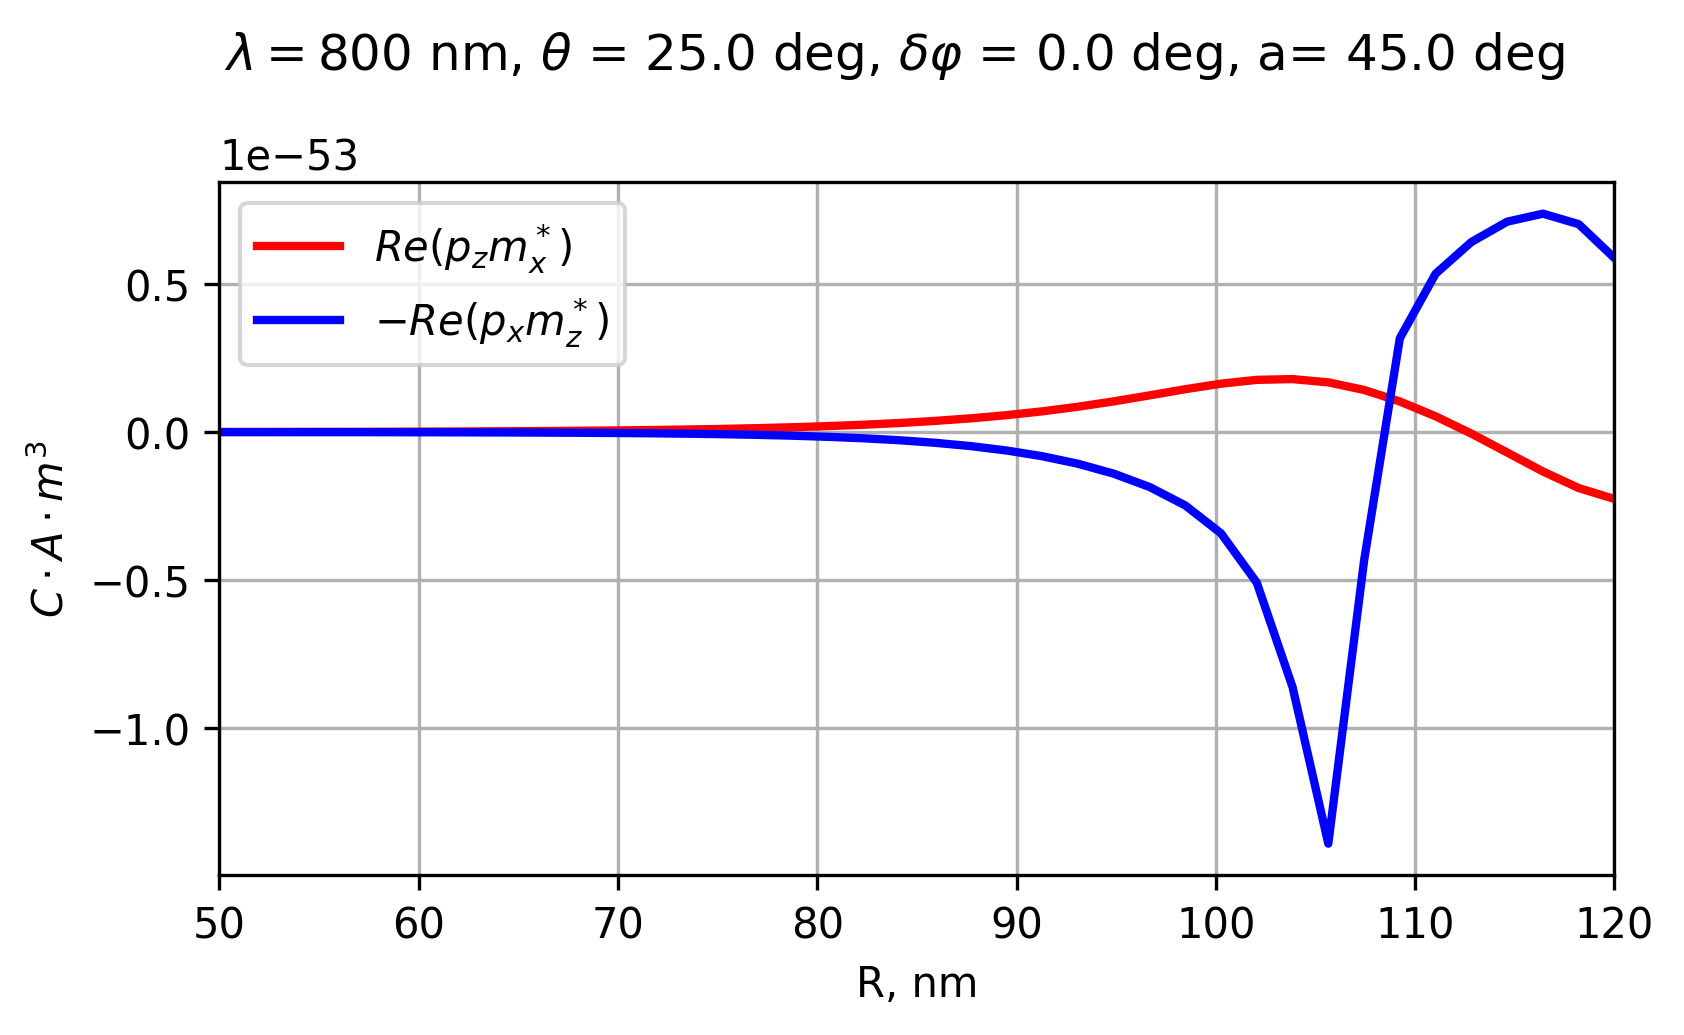

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3), dpi=300)

# Plot dipole moments product
axs.plot(R, np.real(np.conj(M[:,0])*P[:,2]), label='$Re(p_z m_x^*)$', lw=2, c='r')
axs.plot(R, -np.real(np.conj(M[:,2])*P[:,0]), label='$-Re(p_x m_z^*)$', lw=2, c='b')
axs.set_ylabel('$C \cdot A \cdot m^3$')
axs.grid()
axs.legend()
axs.set_xlim([R[0],R[-1]])
axs.set_xlabel('R, nm')
fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)

plt.savefig(f'pzmx_pxmz_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', bbox_inches='tight')
plt.show()
